### Логистическая регрессия

В отличие от линейной регрессии, которая используется для предсказания числовых значений, логистическая регрессия используется для предсказания категориальных значений. Её результаты ограничены 0 и 1. Пороговое значение (обычно 0.5) используется для принятия решения о классификации объекта.

Импортируем необходимые библиотеки и прочитаем данные.

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
data = pd.read_csv('datasets/sat_admitted.csv')

In [5]:
data.sample(5)

,SAT,Admitted
163,1722,Yes
87,1979,Yes
37,1872,Yes
146,1510,No
19,1855,Yes


Будем использовать метод `map()` для преобразования категориальных значений в числовые в столбце `Admitted`. Метод `map()` принимает в качестве аргумента словарь, где ключи - это старые значения в столбце, а значения - это соответствующие новые значения, на которые необходимо заменить старые значения. В данном случае мы заменяем 'No' на 0 и 'Yes' на 1.

In [6]:
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data.sample(5)

,SAT,Admitted
42,1931,1
125,1550,0
20,1987,1
31,1675,1
39,1393,0


Разделим данные на зависимые и независимые переменные.

In [7]:
y = data['Admitted']
x1 = data['SAT']

Визуализируем на наши данные.

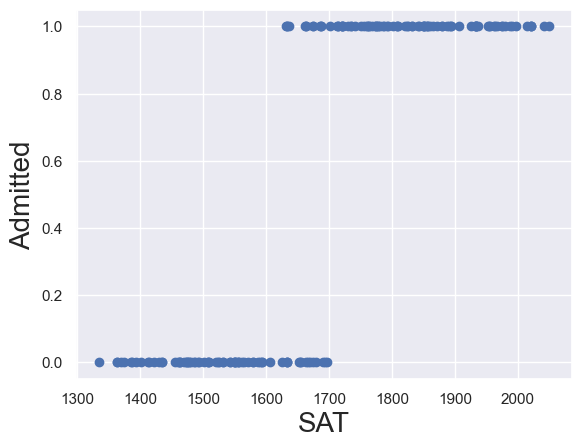

In [8]:
# x1 (SAT, без константы), y (Admitted)
plt.scatter(x1, y, color='C0')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

Упс, категориальные признаки..

In [17]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y, x)
results_lin = reg_lin.fit()

Получили параметры. Теперь посмотрим подойдёт ли нам линейная регрессия.

In [18]:
results_lin.params

const   -3.251859
SAT      0.002248
dtype: float64

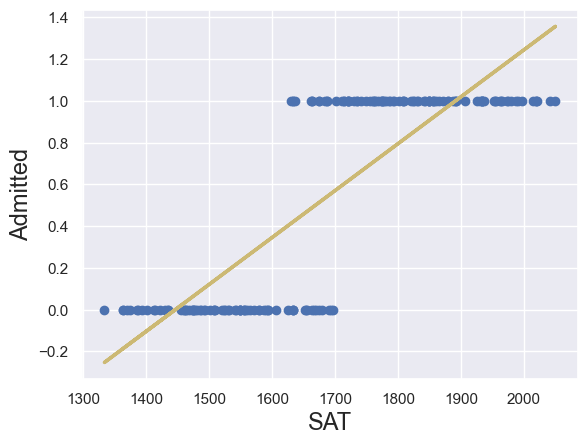

In [19]:
plt.scatter(x1, y)

y_hat = x1 * results_lin.params[1] + results_lin.params[0]

plt.plot(x1,y_hat,lw=2.5,color='C8')

plt.xlabel('SAT', fontsize=17)
plt.ylabel('Admitted', fontsize=17)

plt.show()

Другой способ работать с категориальными признаками.

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


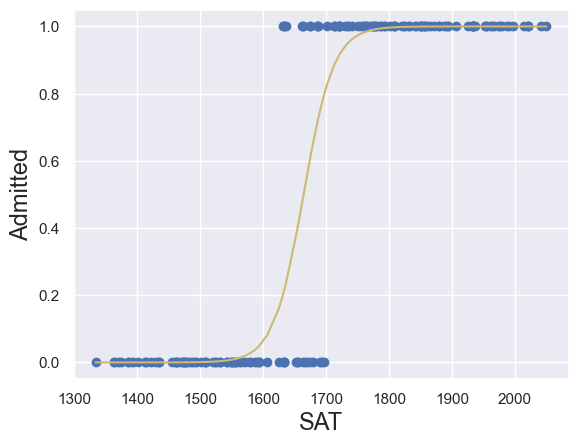

In [20]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y)
plt.xlabel('SAT', fontsize = 17)
plt.ylabel('Admitted', fontsize = 17)
plt.plot(x_sorted, f_sorted, color='C8')

plt.show()

Максимальное количество итераций в Statsmodels - 35.

In [13]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Fri, 24 Mar 2023   Pseudo R-squ.:                  0.7992
Time:                        21:51:07   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Логистическая регрессия в Sklearn

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
reg_log = LogisticRegression()
reg_log.fit(x, y)

LogisticRegression()

## Предскажем значения

In [16]:
reg_log.predict([[1, 1390], [1, 1690]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1])